In [28]:
import numpy as np
import seaborn as sns
import numpy.random as rd
import matplotlib.pyplot as plt
import math
from IPython.display import display, Math
import scipy.stats as st


### Задача 3. Вариант 6.   

Рассмотрим последовательность случайных величин $ \xi_n \in \mathcal{Bin}(n, p_n) $, $ k $ = 0,1,2,... . Пусть $ np_n \to \lambda > 0 $ при $ n \to \infty $. Продемонстрируйте выполнение теоремы Пуассона:    
$$ P(\xi_n = k) \to_{n \to \infty} \frac{\lambda^ke^-\lambda}{k!} $$     

(Таким образом, случайная величина $ \xi_n $ имеет асимптотически распределение Пуассона с параметром $ \lambda $)


##### Решение
Смоделируем 2 случайные  величины, имеющие биномиальное распределение и распределение Пуассона, и сравним их.

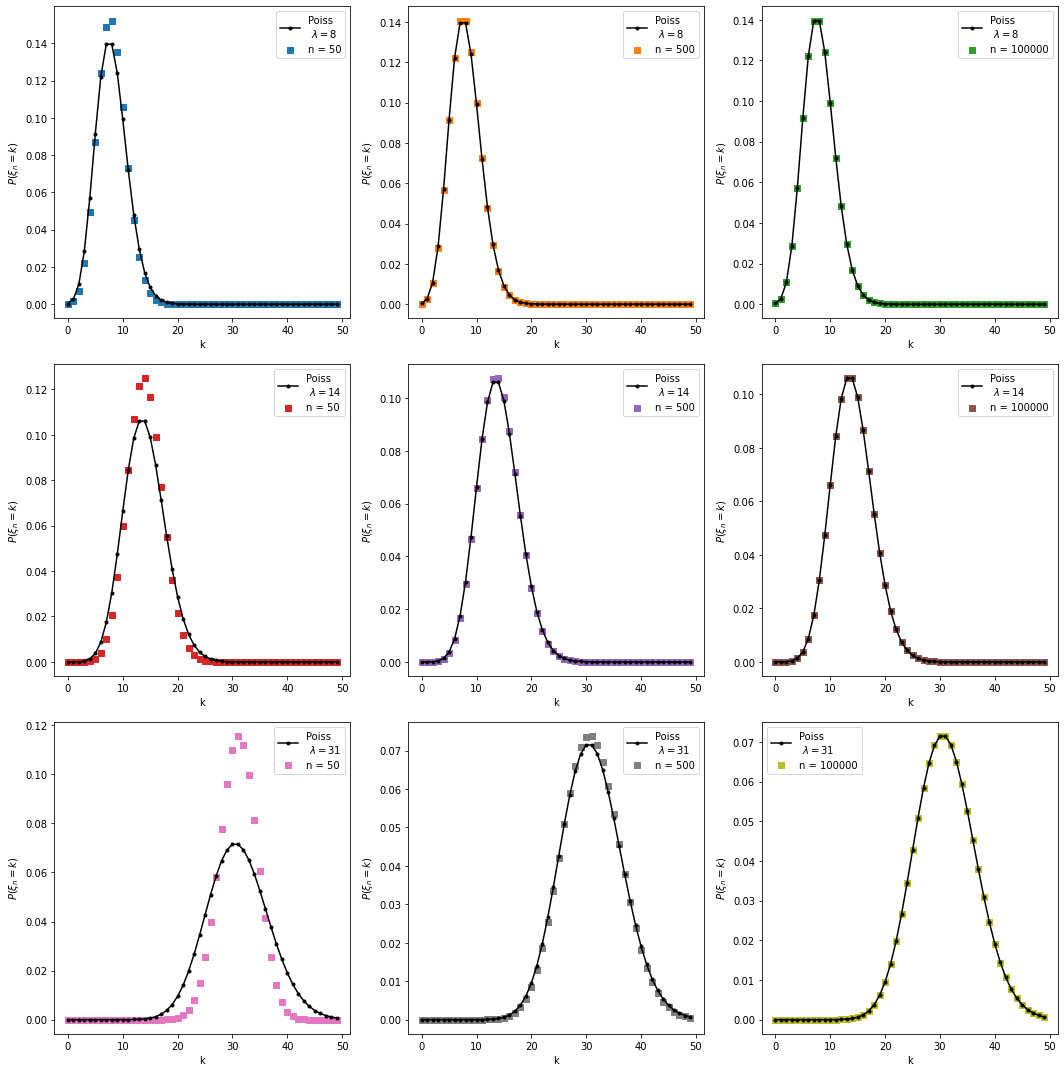

Wall time: 1.02 s


In [26]:
%%time
cmap = plt.get_cmap("tab10").colors
plt.figure(figsize=(15, 15))

# некоторые параметры распределений
lambdas = [8,8,8,14,14,14,31,31,31] # лямбды
n = [50, 500, 100000, 50, 500, 100000, 50, 500, 100000] # количества точек

for kn, lambda_ in zip(enumerate(n), lambdas):
    k, n = kn
    # считаем вероятность p в биномиальном распределении
    p = lambda_ / n
    # считаем вероятности принятия случайной величины кси значения k, имеющей биномиальное распределение
    c = [st.binom.pmf(k, n, p) for k in range(50)]
    plt.subplot(3, 3, k+1)
    plt.tight_layout()
    # считаем вероятности принятия случайной величины кси значения k, имеющей распределение Пуасссона
    y = [st.poisson.pmf(k, lambda_) for k in range(50)]
    # Строим графики по данным точкам
    plt.plot(list(range(50)), y, '.-', c='k', label="Poiss\n $\lambda = $" + str(lambda_))
    plt.scatter(list(range(50)), c, marker='s', color=cmap[k], label="n = " + str(n))
    plt.xlabel("k")
    plt.ylabel(r"$P(\xi _n=k)$")
    plt.legend()
plt.show()

Полученные графики показывают, что действительно случайная величина $ \xi_n $, имеющая биномиальное распределение при $ n \to \infty $ имеет асимптотически распределение Пуассона.